In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_confusion_matrix(cm_dict, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    Plots a confusion matrix graphic.
    
    Parameters:
        y_true (array-like): The true target values.
        y_pred (array-like): The predicted target values.
        classes (list): List of class labels (strings) in the order of the confusion matrix.
        title (str): Title of the confusion matrix plot.
        cmap (matplotlib colormap): Colormap to be used for the heatmap (default is plt.cm.Blues).

    Returns:
        None
    """
    cm = np.array([cm_dict['tp'], cm_dict['fp'], cm_dict['fn'], cm_dict['tn']]).reshape(2, 2)
    cm_normalized = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, cmap=cmap, fmt=".2f", xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
import nba_predictor
import pandas as pd

Running decision tree model, 5 game rolling average, and 5 features...
Finding best 5 features...
Best Features: fg_pct_home, dreb_home, fg_pct_away, ft_pct_away, blk_away
Back testing model...
Done!
Model Info:
-----------
Model: DecisionTreeClassifier()
Number of Games: 5
Best Features: fg_pct_home, dreb_home, fg_pct_away, ft_pct_away, blk_away
Metrics:
Accuracy: 0.5231
Precision: 0.6019
Recall: 0.6048
F1 Score: 0.6034


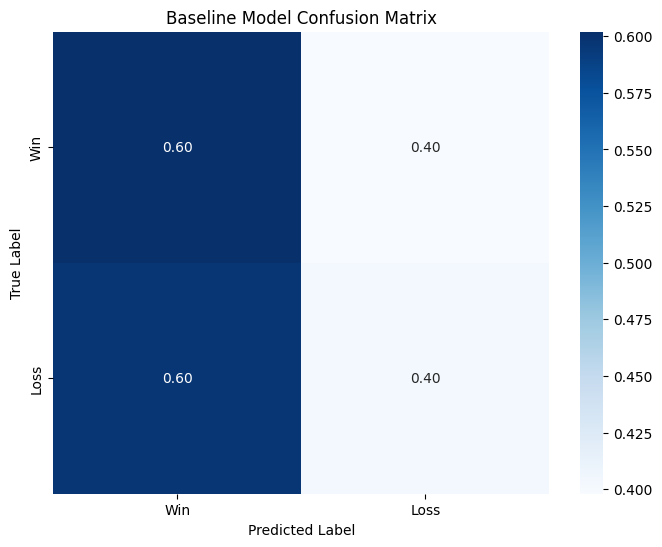

In [15]:
predictor = nba_predictor.NbaPredictor(num_games=5, num_features=5)
predictor.tree_model()

confused_matrix = predictor.confusion_matrix
plot_confusion_matrix(confused_matrix, ['Win', 'Loss'], title='Baseline Model Confusion Matrix')

Running logistic regression model, 5 game rolling average, and 5 features...
Finding best 5 features...
Best Features: fg_pct_home, ft_pct_home, dreb_home, fg3m_away, stl_away
Back testing model...
Done!
Model Info:
-----------
Model: LogisticRegression(max_iter=1000, n_jobs=-1)
Number of Games: 5
Best Features: fg_pct_home, ft_pct_home, dreb_home, fg3m_away, stl_away
Metrics:
Accuracy: 0.5998
Precision: 0.5998
Recall: 0.9999
F1 Score: 0.7498


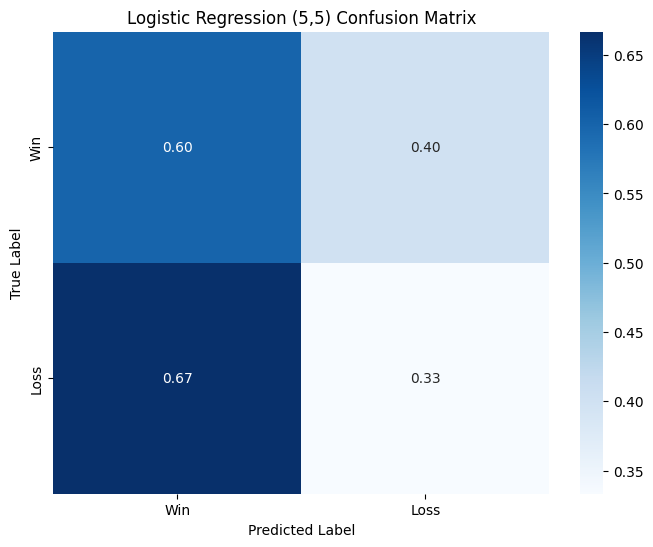

In [16]:
predictor = nba_predictor.NbaPredictor(num_games=5, num_features=5)
predictor.log_reg_model()

confused_matrix = predictor.confusion_matrix
plot_confusion_matrix(confused_matrix, ['Win', 'Loss'], title='Logistic Regression (5,5) Confusion Matrix')

Running logistic regression model, 5 game rolling average, and 10 features...
Finding best 10 features...
Best Features: fg_pct_home, ft_pct_home, dreb_home, ast_home, stl_home, blk_home, tov_home, fg3m_away, fg3a_away, stl_away
Back testing model...
Done!
Model Info:
-----------
Model: LogisticRegression(max_iter=1000, n_jobs=-1)
Number of Games: 5
Best Features: fg_pct_home, ft_pct_home, dreb_home, ast_home, stl_home, blk_home, tov_home, fg3m_away, fg3a_away, stl_away
Metrics:
Accuracy: 0.5998
Precision: 0.5998
Recall: 1.0000
F1 Score: 0.7498


C:\Users\mvela\AppData\Local\Temp\ipykernel_72912\1417647968.py:20: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis])


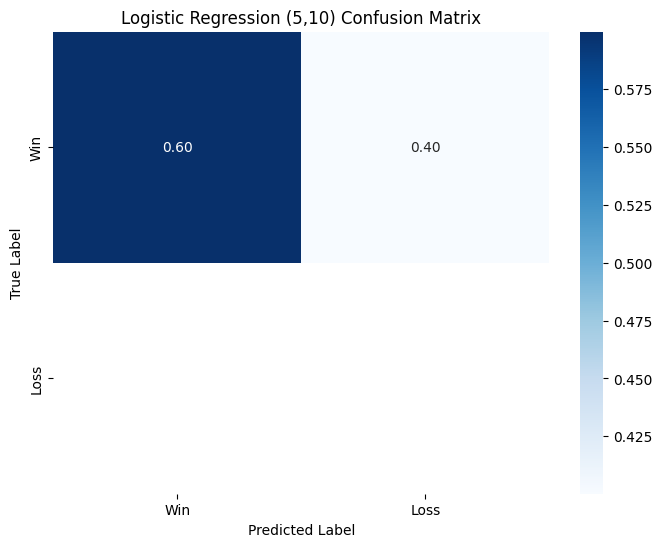

In [17]:
predictor = nba_predictor.NbaPredictor(num_games=5, num_features=10)
predictor.log_reg_model()

confused_matrix = predictor.confusion_matrix
plot_confusion_matrix(confused_matrix, ['Win', 'Loss'], title='Logistic Regression (5,10) Confusion Matrix')

Running logistic regression model, 5 game rolling average, and 5 features...
Finding best 5 features...
Best Features: fg_pct_home, ft_pct_home, dreb_home, fg3m_away, stl_away
Back testing model...
Done!
Model Info:
-----------
Model: LogisticRegression(max_iter=1000, n_jobs=-1)
Number of Games: 5
Best Features: fg_pct_home, ft_pct_home, dreb_home, fg3m_away, stl_away
Metrics:
Accuracy: 0.5998
Precision: 0.5998
Recall: 0.9999
F1 Score: 0.7498


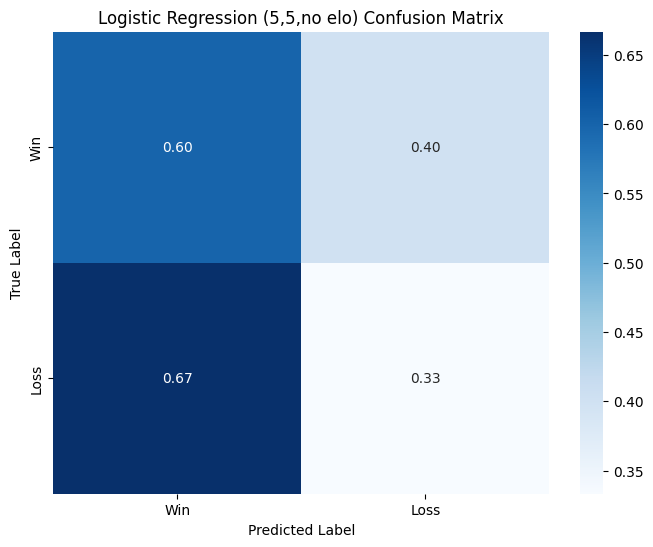

In [18]:
predictor = nba_predictor.NbaPredictor(num_games=5, num_features=5, no_elo=True)
predictor.log_reg_model()

confused_matrix = predictor.confusion_matrix
plot_confusion_matrix(confused_matrix, ['Win', 'Loss'], title='Logistic Regression (5,5,no elo) Confusion Matrix')

Running knn model with 15 neighbors, 5 game rolling average, and 5 features...
Finding best 5 features...
Best Features: fg_pct_home, ast_home, stl_home, plus_minus_home, fg_pct_away
Back testing model...
Done!
Model Info:
-----------
Model: KNeighborsClassifier(n_jobs=-1, n_neighbors=15)
Number of Games: 5
Best Features: fg_pct_home, ast_home, stl_home, plus_minus_home, fg_pct_away
Metrics:
Accuracy: 0.5690
Precision: 0.6013
Recall: 0.8348
F1 Score: 0.6991


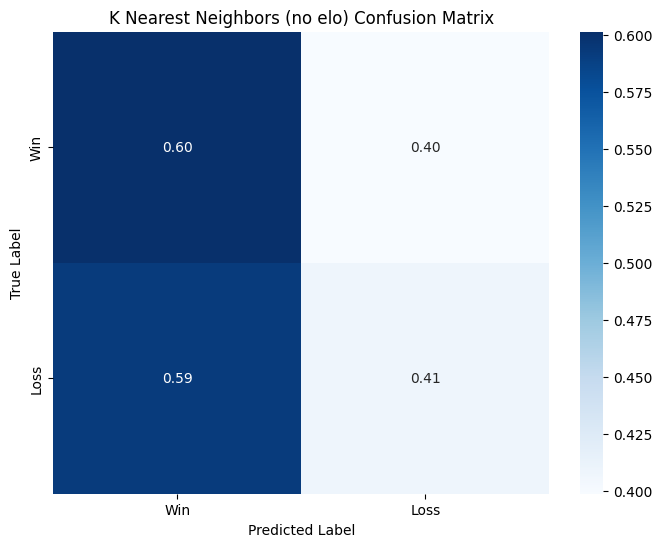

In [19]:
predictor.knn_model(k=15)

confused_matrix = predictor.confusion_matrix
plot_confusion_matrix(confused_matrix, ['Win', 'Loss'], title='K Nearest Neighbors (no elo) Confusion Matrix')

Model Info:
-----------
Model: baseline
Number of Games: 5
Best Features: 
Metrics:
Accuracy: 0.6019
Precision: 0.6019
Recall: 1.0000
F1 Score: 0.7515


C:\Users\mvela\AppData\Local\Temp\ipykernel_255288\1417647968.py:20: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis])


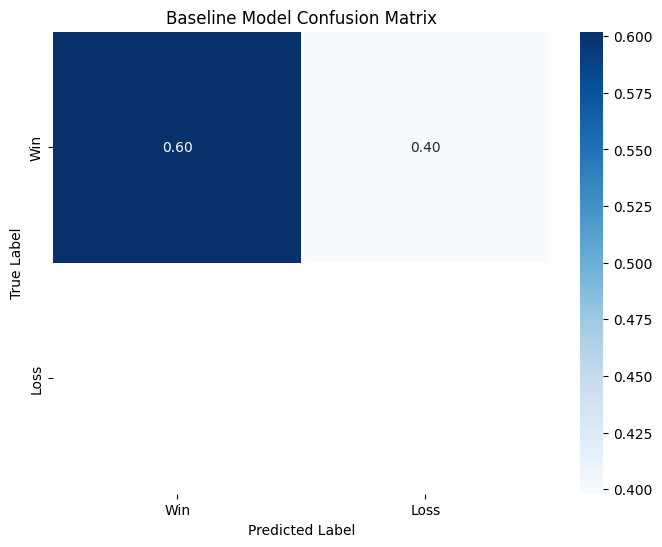

In [5]:
import nba_predictor

predictor = nba_predictor.NBAPredictor(num_games=5, num_features=5)
predictor.base_line()

confused_matrix = predictor.confusion_matrix
plot_confusion_matrix(confused_matrix, ['Win', 'Loss'], title='Baseline Model Confusion Matrix')

In [20]:
df = pd.read_csv('observations_report.csv')
df

,accuracy,precision,recall,f1,parameters,model,features,num_games,cm,num_features,no_elo
0,0.601917,0.601917,1.000000,0.751496,Baseline,baseline,[],5,NaN,NaN,NaN
1,0.675925,0.687562,0.846053,0.758618,Baseline,elo,[],5,NaN,NaN,NaN
2,0.676703,0.696984,0.815560,0.751624,"5,5",Logistic Regression,"['fg3a_home', 'plus_minus_home', 'elo_home', '...",5,NaN,5.0,False
3,0.643620,0.692249,0.730667,0.710939,"5,5",KNN,"['elo_home', 'ft_pct_away', 'reb_away', 'ast_a...",5,NaN,5.0,False
4,0.675525,0.688597,0.837990,0.755984,"10,5",Logistic Regression,"['fg3_pct_home', 'elo_home', 'oreb_away', 'pts...",10,NaN,5.0,False
5,0.646901,0.694524,0.734256,0.713838,"10,5",KNN,"['blk_home', 'elo_home', 'ftm_away', 'fta_away...",10,NaN,5.0,False
6,0.676447,0.696572,0.816030,0.751584,"5,10",Logistic Regression,"['fg3a_home', 'dreb_home', 'ast_home', 'plus_m...",5,NaN,10.0,False
7,0.646747,0.695271,0.731778,0.713058,"5,10",KNN,"['ast_home', 'blk_home', 'pf_home', 'plus_minu...",5,NaN,10.0,False
8,0.676780,0.697479,0.814321,0.751385,"15,10",Logistic Regression,"['fgm_home', 'fg3a_home', 'oreb_home', 'elo_ho...",15,NaN,10.0,False
9,0.648797,0.695814,0.736392,0.715528,"15,10",KNN,"['fg3_pct_home', 'ft_pct_home', 'stl_home', 'e...",15,NaN,10.0,False


In [50]:
# plot the accuracy of each model, group models together with their parameters
# for example, the baseline model is grouped with the elo model
# the logistic regression model is grouped with the logistic regression model with no elo

def plot_metric(df, metric='accuracy'):
    plt = sns.barplot(x='model', y=metric, hue='parameters', data=df)

    # set the legend on the top left
    # plt.legend(title='Parameters\n(num_games,\n num_features)')
    plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0., title='Parameters\n(num_games,\n num_features)')

    # change y axis to fit the metric
    min_y = df[metric].min()
    max_y = df[metric].max()
    plt.set_ylim(min_y - 0.01, max_y + 0.01)


    # add a title
    plt.set_title(f'Model {metric.capitalize()}')

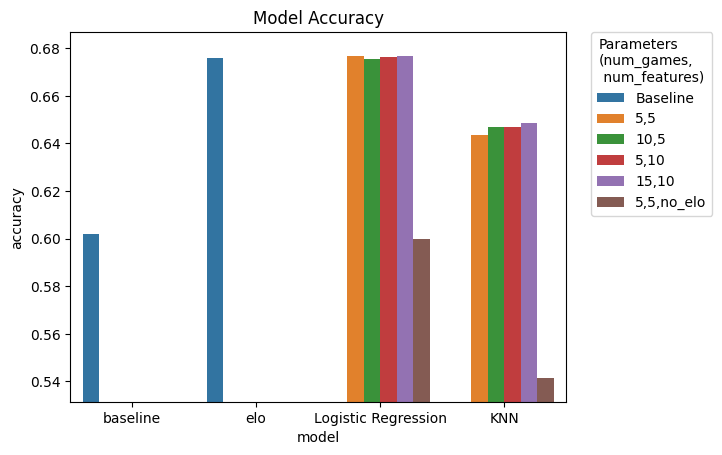

In [51]:
plot_metric(df)

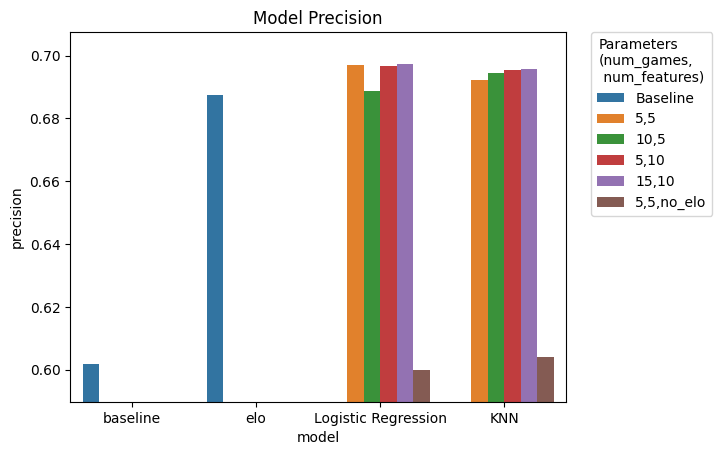

In [52]:
plot_metric(df, metric='precision')

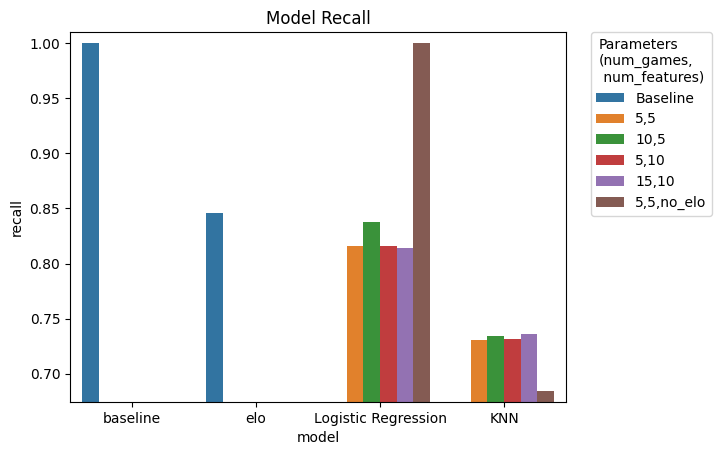

In [53]:
plot_metric(df, metric='recall')

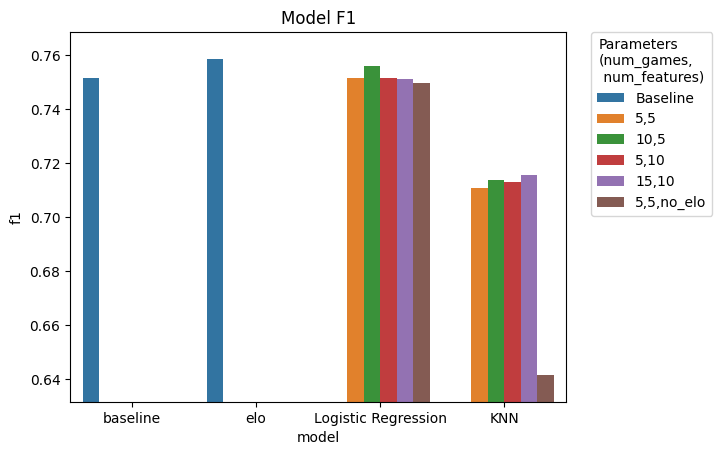

In [54]:
plot_metric(df, metric='f1')

In [57]:
import nba_predictor
predictor = nba_predictor.NBAPredictor(num_games=5, num_features=5)
predictor.elo_model(homecourt_adv=0)

TypeError: NBAPredictor.elo_model() got an unexpected keyword argument 'homecourt_adv'